In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import yfinance as yf 

from pandas_datareader.data import DataReader
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

APPLE INC Data :
---------------

In [26]:
# Download the AAPL stock data from Yahoo Finance
aapl = yf.Ticker("AAPL")
df = aapl.history(period="5Y")


# Print the first few rows of the dataset
print(df.head())

print("Column Name - ", df.columns)

print(df.shape)

                                Open       High        Low      Close  \
Date                                                                    
2018-02-20 00:00:00-05:00  41.004716  41.531423  40.854566  40.957050   
2018-02-21 00:00:00-05:00  41.190620  41.498065  40.756857  40.771160   
2018-02-22 00:00:00-05:00  40.945139  41.457547  40.923690  41.111969   
2018-02-23 00:00:00-05:00  41.390805  41.862698  41.359821  41.826950   
2018-02-26 00:00:00-05:00  42.029545  42.754067  41.996179  42.653969   

                              Volume  Dividends  Stock Splits  
Date                                                           
2018-02-20 00:00:00-05:00  135722000        0.0           0.0  
2018-02-21 00:00:00-05:00  149886400        0.0           0.0  
2018-02-22 00:00:00-05:00  123967600        0.0           0.0  
2018-02-23 00:00:00-05:00  135249600        0.0           0.0  
2018-02-26 00:00:00-05:00  152648800        0.0           0.0  
Column Name -  Index(['Open', 'High', 'L

In [27]:
# Print the summary statistics of the dataset
print(df.describe())

              Open         High          Low        Close        Volume  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03   
mean     99.205889   100.428336    98.051009    99.291453  1.146172e+08   
std      46.206617    46.812218    45.607405    46.236266  5.395467e+07   
min      34.688531    35.107743    34.211498    34.257275  3.519590e+07   
25%      50.600514    50.870950    50.037637    50.462705  7.862990e+07   
50%     109.109567   110.766727   107.277609   109.107124  1.001422e+08   
75%     142.536811   144.790290   141.170691   143.075806  1.343200e+08   
max     181.299361   181.607100   177.814925   180.683868  4.265100e+08   

         Dividends  Stock Splits  
count  1258.000000   1258.000000  
mean      0.003275      0.003180  
std       0.025870      0.112777  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.230000      4.000000  


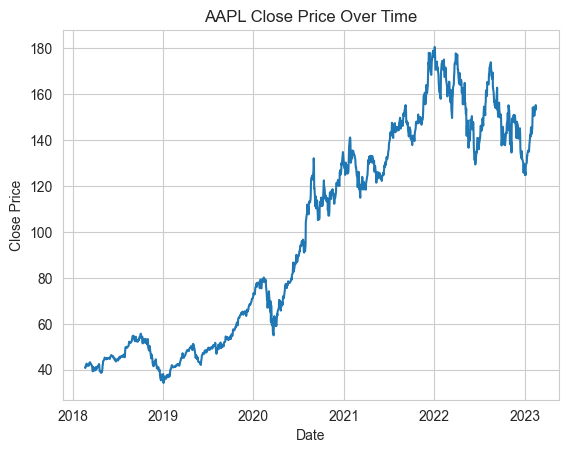

In [28]:
# Plot the adjusted close price over time
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price Over Time')
plt.show()

[*********************100%***********************]  5 of 5 completed


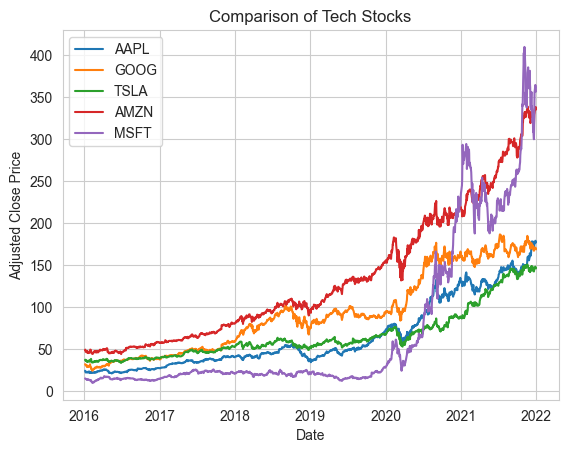

In [29]:
# Define the ticker symbols
tickers = ["AAPL", "GOOG", "TSLA", "AMZN", "MSFT"]

# Retrieve the data
data = yf.download(tickers, start="2016-01-01", end="2021-12-31")["Adj Close"]


# Plot the data
plt.plot(data)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Comparison of Tech Stocks")
plt.legend(tickers)

# Show the plot
plt.show()

Compared the closing prices all the mentioned companies from 2016-2022 

1. Microsoft was below other companies till 2020, there is a significant increase in the stock prices from 2020 
2. There is a steady increase in Amazon, Tesla, Google and Apple. 


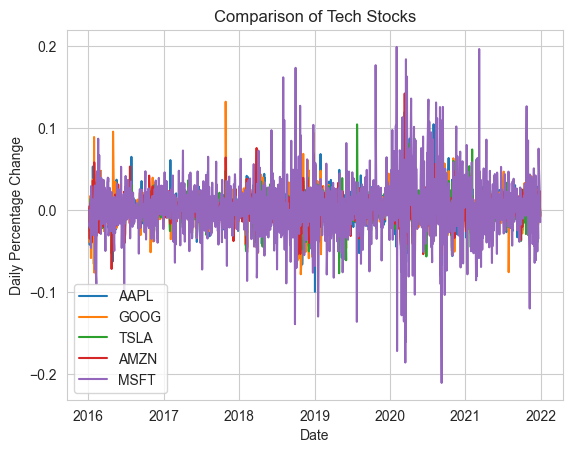

In [30]:
# Calculate the daily percentage change
daily_returns = data.pct_change()

# Plot the data
plt.plot(daily_returns)

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change")
plt.title("Comparison of Tech Stocks")
plt.legend(tickers)

# Show the plot
plt.show()

Comparisons of daily percentage change from 2016 to 2022
1. Microsoft has the most percentage change from the previous day compared to other companies
2. Google has the second most signficant change 
3. Other companies change are not that significant

In [31]:
# The tech stocks we'll be using are Apple, Google, Microsoft and Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']

end_date = datetime.now()
start_date = datetime(end_date.year - 5, end_date.month, end_date.day)
print(start_date)
print(end_date)

#For loop for getting the stock data
for stock in tech_list:   
    globals()[stock] = yf.download(stock, start=start_date, end=end_date)
    #data = yf.download(stock, start=start_date, end=end_date)
    #print(data)


2018-02-16 00:00:00
2023-02-16 21:44:16.846149
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-07-28,76.259003,76.323997,74.883003,75.016998,75.016998,34044000,GOOGLE
2021-03-23,225.256668,225.933334,219.169998,220.720001,220.720001,91475700,TESLA
2019-02-01,81.944000,83.653000,81.100502,81.311501,81.311501,230124000,AMAZON
2021-08-10,146.440002,147.710007,145.300003,145.600006,144.328522,69023100,APPLE
2022-04-14,288.089996,288.309998,279.320007,279.829987,277.111420,28221600,MICROSOFT


Individual Adjacent closing prices: 

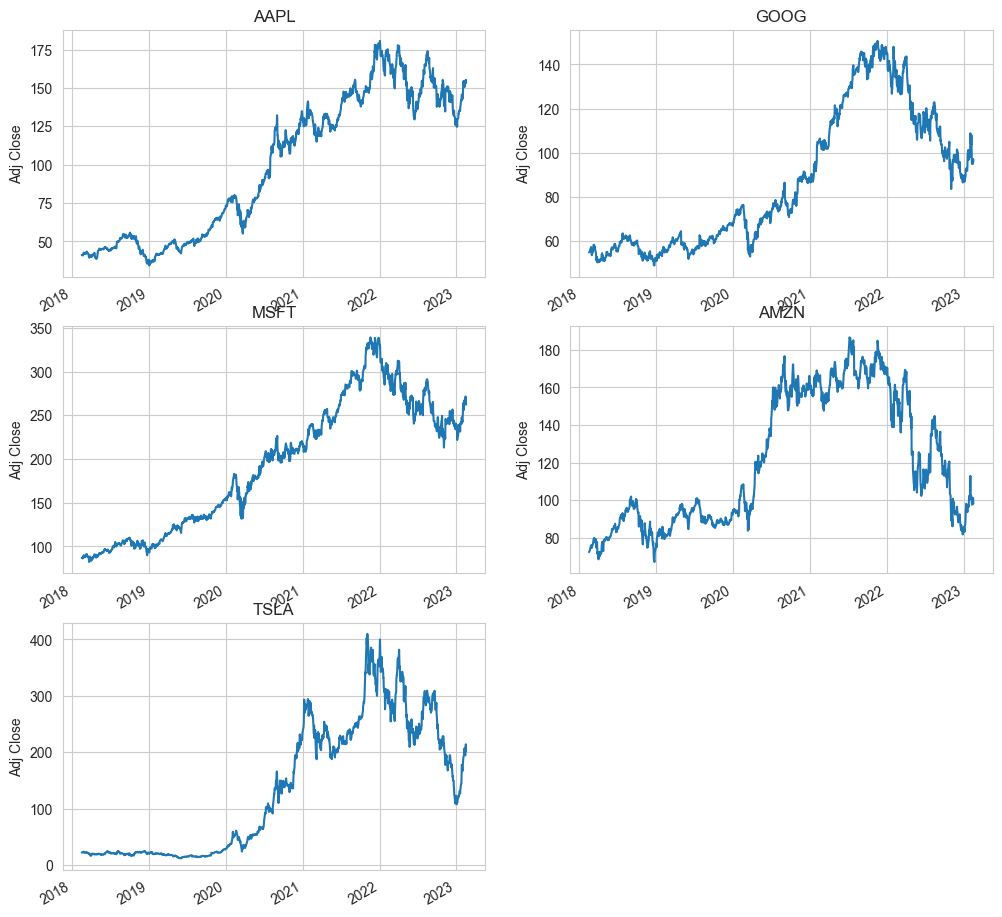

In [33]:
# To see a historical view of the closing price. For historical view we'll be using Adj. Closing price

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Individual Volume graph:

1. The volume of Apple and Tesla dropped to avg in 2021 to 2023 
2. Google and Amazon has the largest avg thorughout the last 5 yrs 


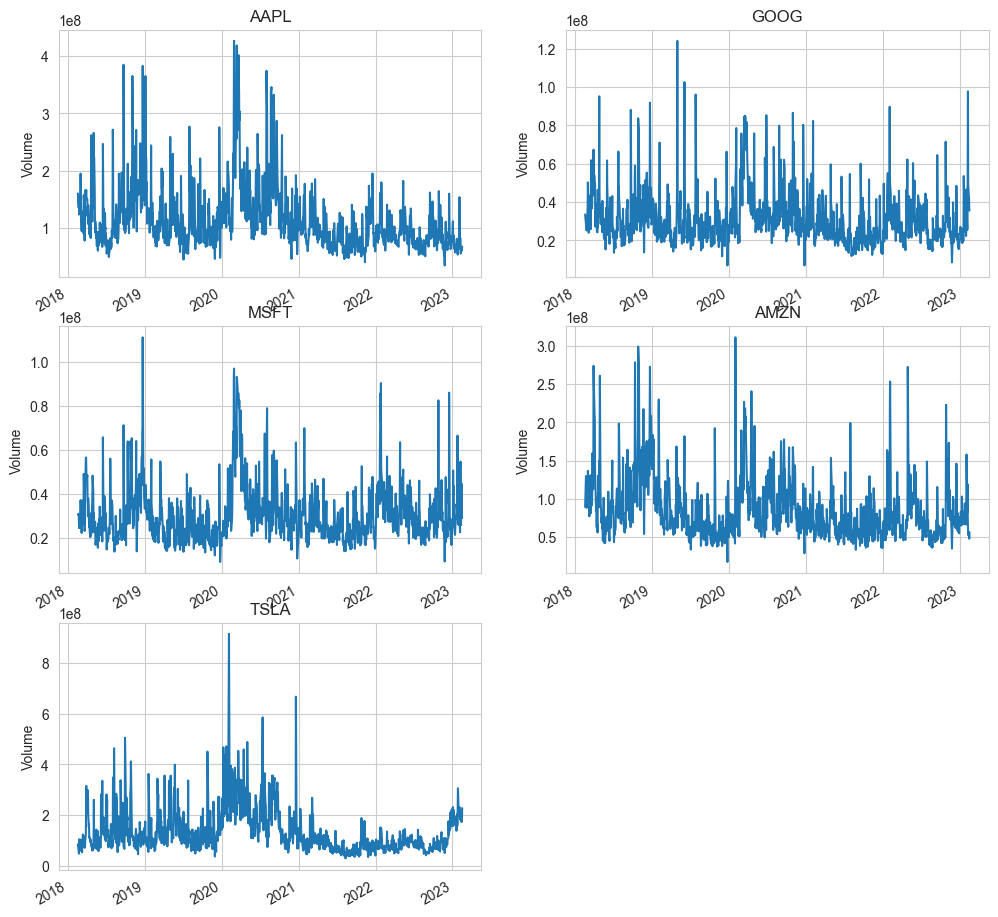

In [34]:
# For plotting the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [35]:
#Moving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [36]:
print(TSLA.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


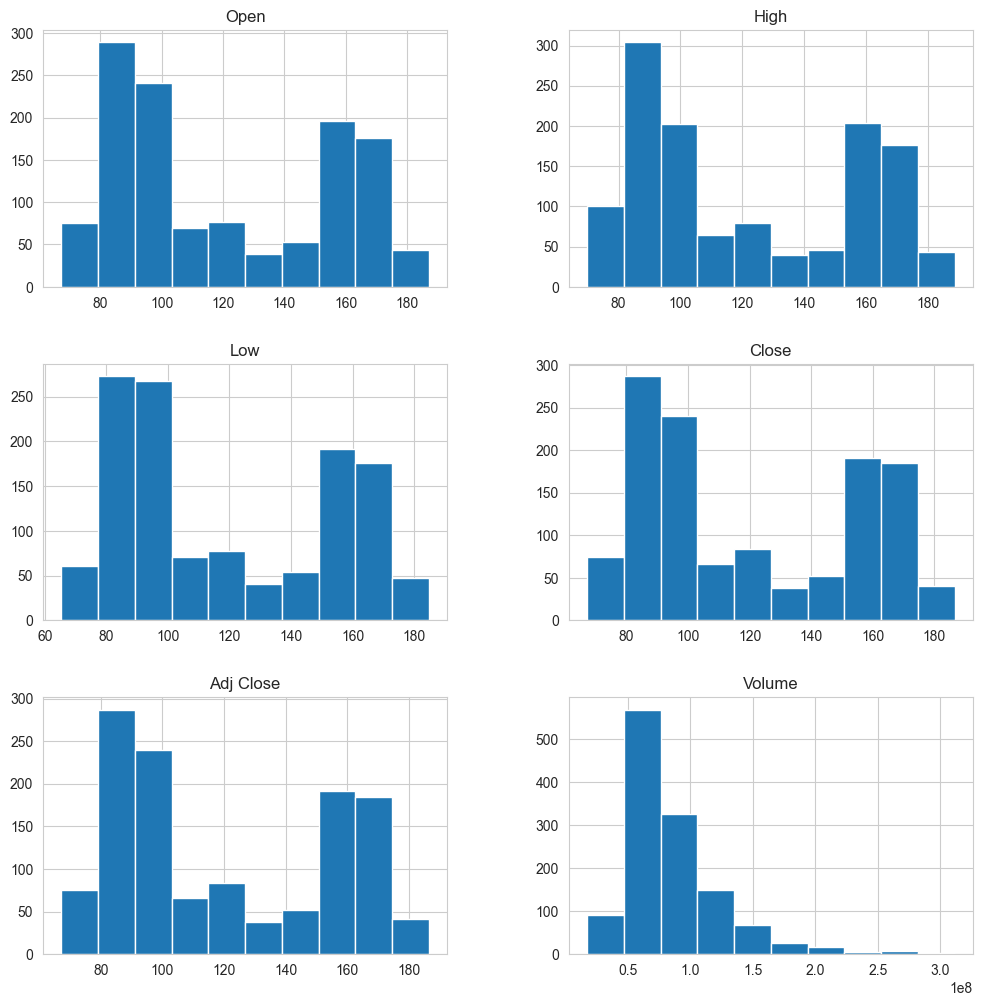

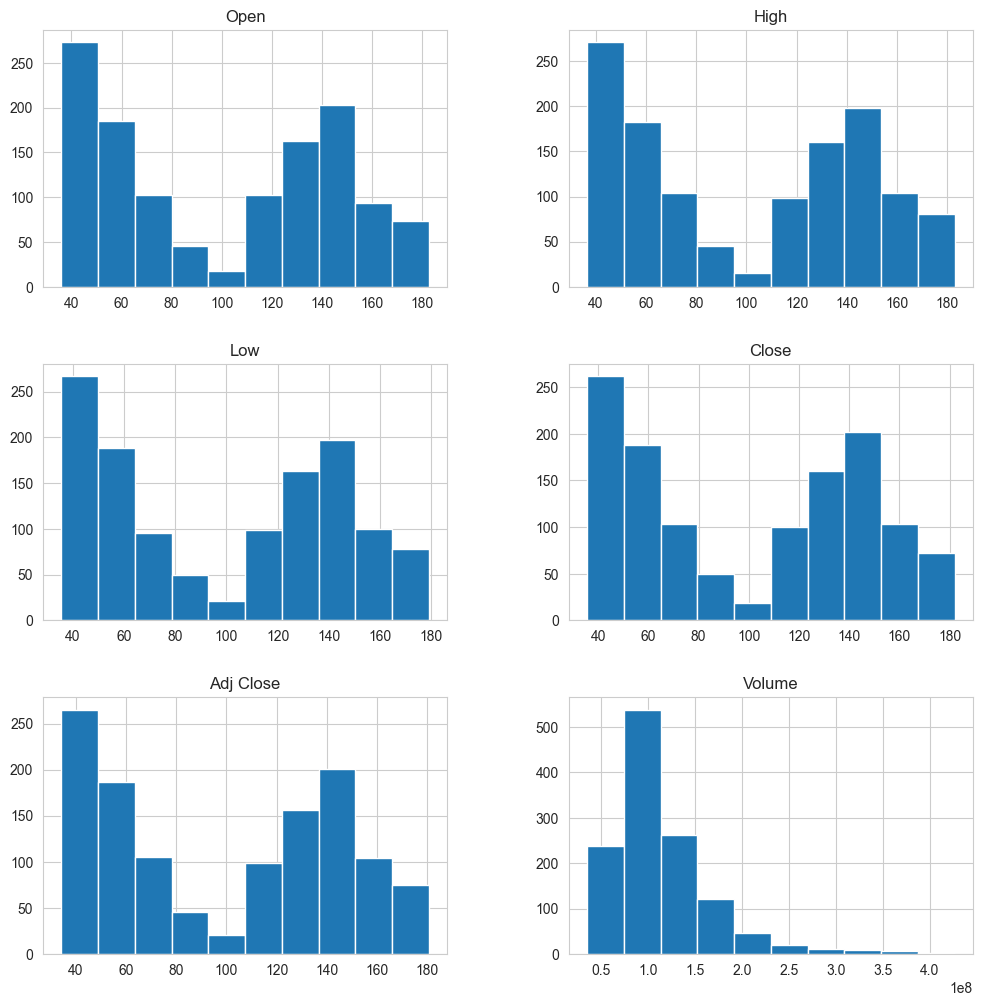

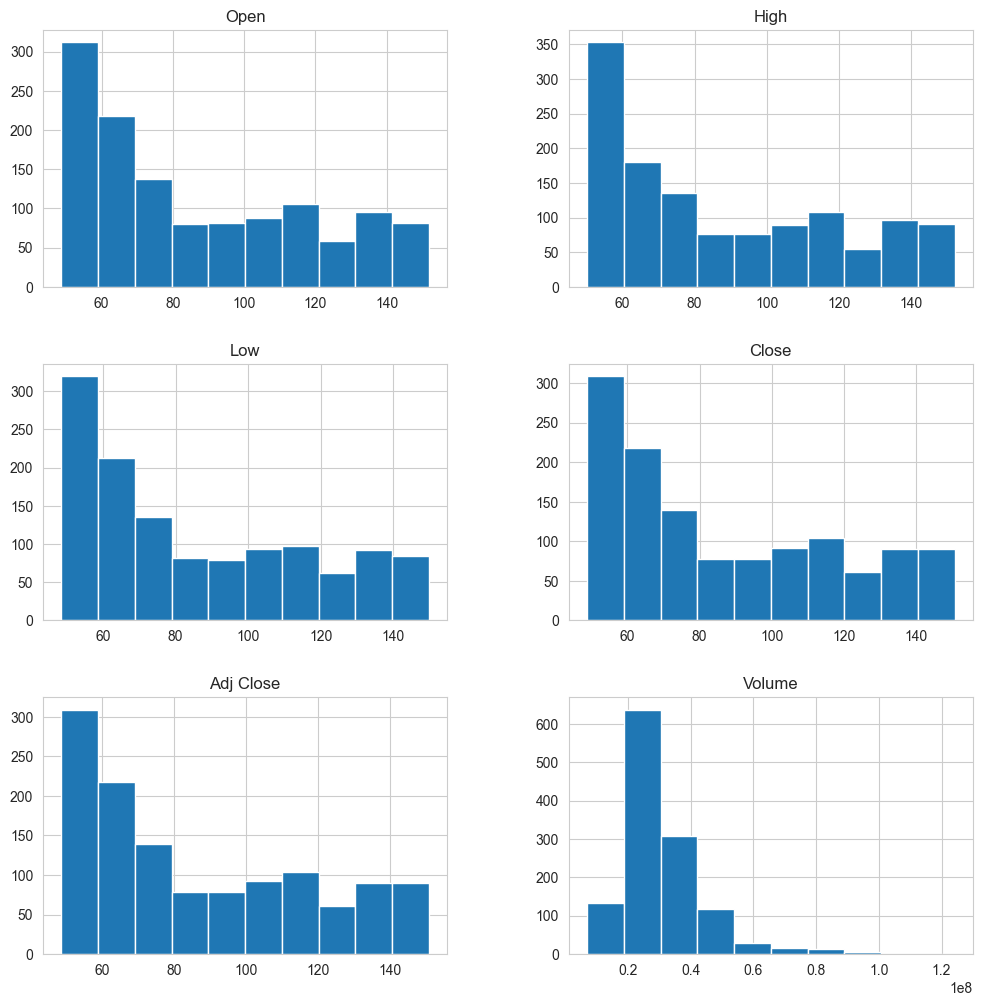

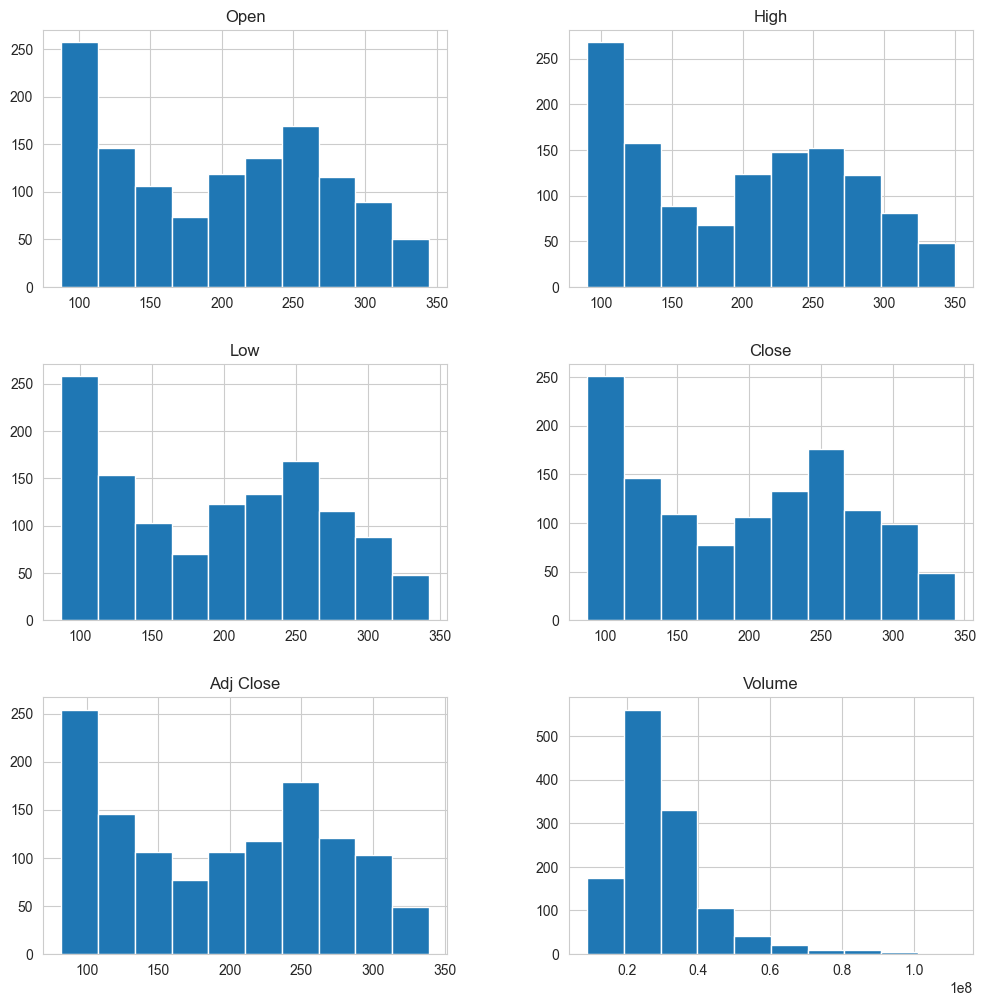

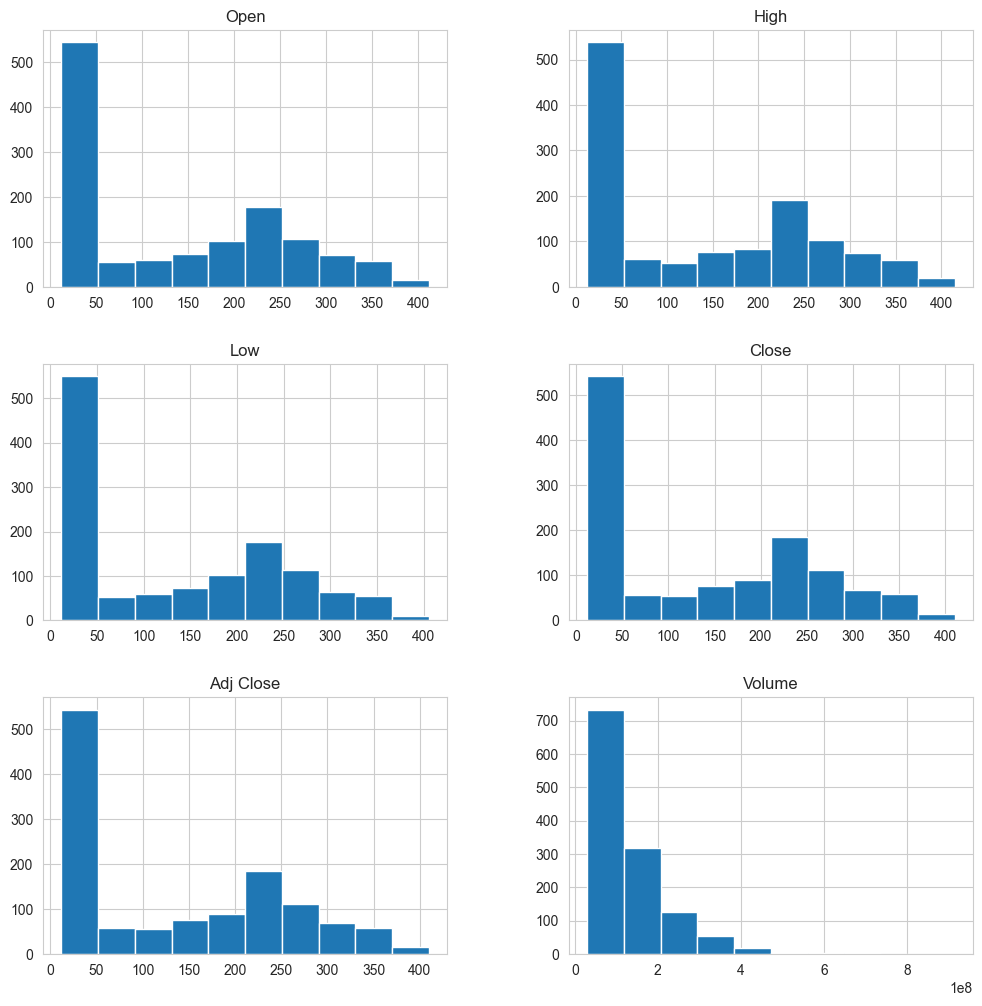

In [37]:
df.groupby("company_name").hist(figsize=(12, 12));

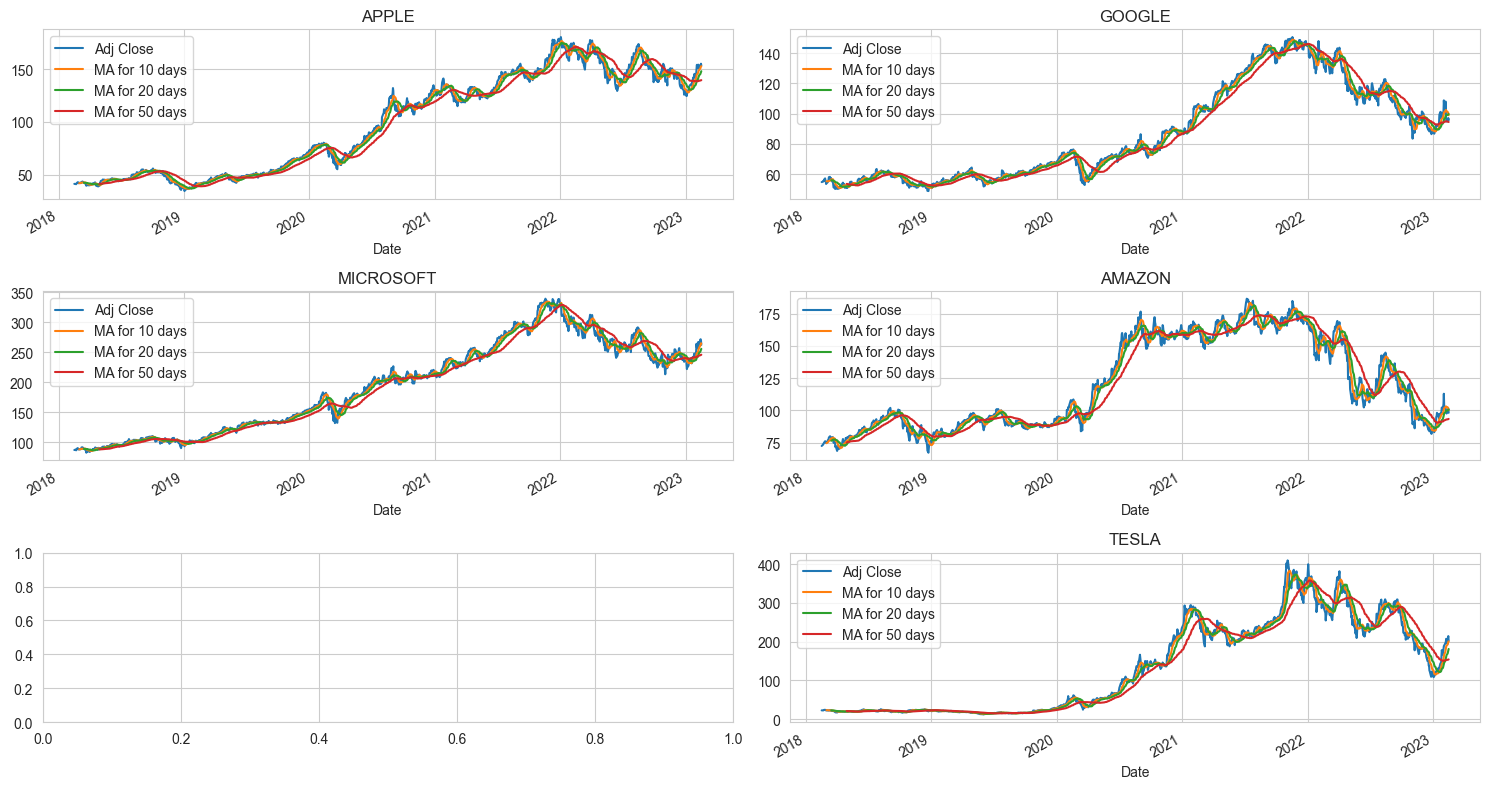

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('TESLA')

fig.tight_layout()

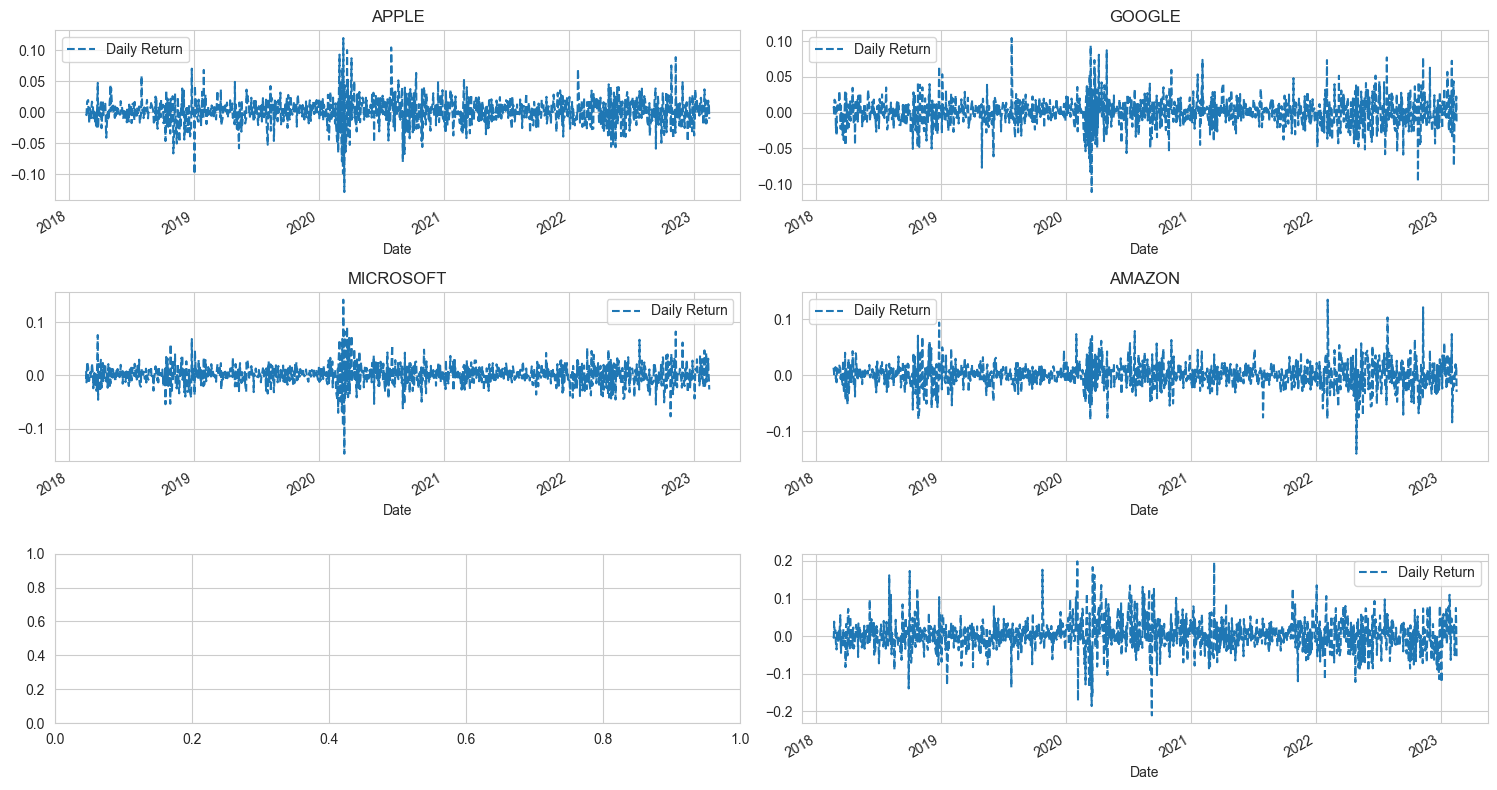

In [39]:
# We have used pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='')
axes[1,1].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


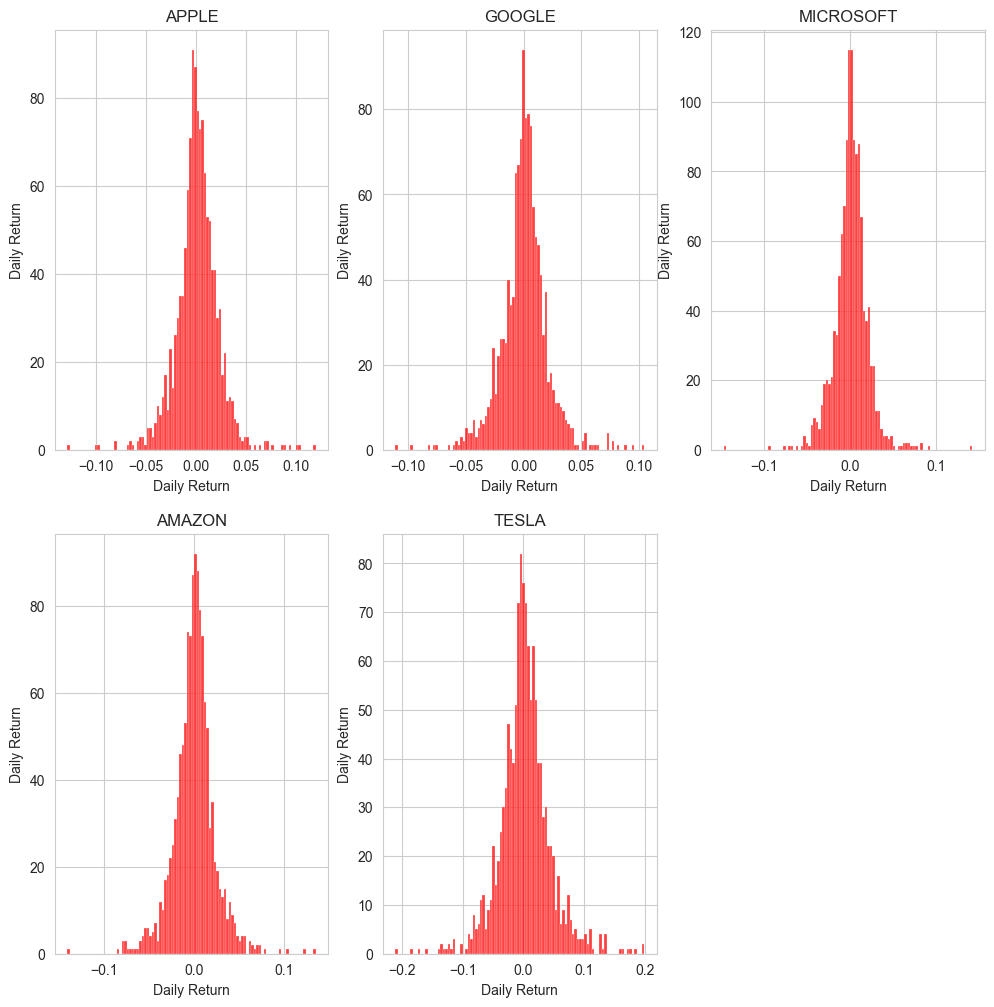

In [40]:
# To get a better view of above chart
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='red')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')


In [41]:
import yfinance as yf

# Creating a new DataFrame for Closing prices
closing_df = yf.download(tech_list, start_date, end_date)['Adj Close']
closing_df.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-02-16,41.095284,72.434502,54.740002,86.827263,22.365999
2018-02-20,40.957062,73.417503,55.123001,87.506790,22.318001
2018-02-21,40.771152,74.146004,55.567001,86.345940,22.219999
2018-02-22,41.111977,74.266998,55.331501,86.572456,23.077999
2018-02-23,41.826973,75.000000,56.339500,88.771446,23.469999


In [42]:
# Making a new DataFrame for returns
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2018-02-16,NaN,NaN,NaN,NaN,NaN
2018-02-20,-0.003363,0.013571,0.006997,0.007826,-0.002146
2018-02-21,-0.004539,0.009923,0.008055,-0.013266,-0.004391
2018-02-22,0.008359,0.001632,-0.004238,0.002623,0.038614
2018-02-23,0.017391,0.009870,0.018217,0.025401,0.016986


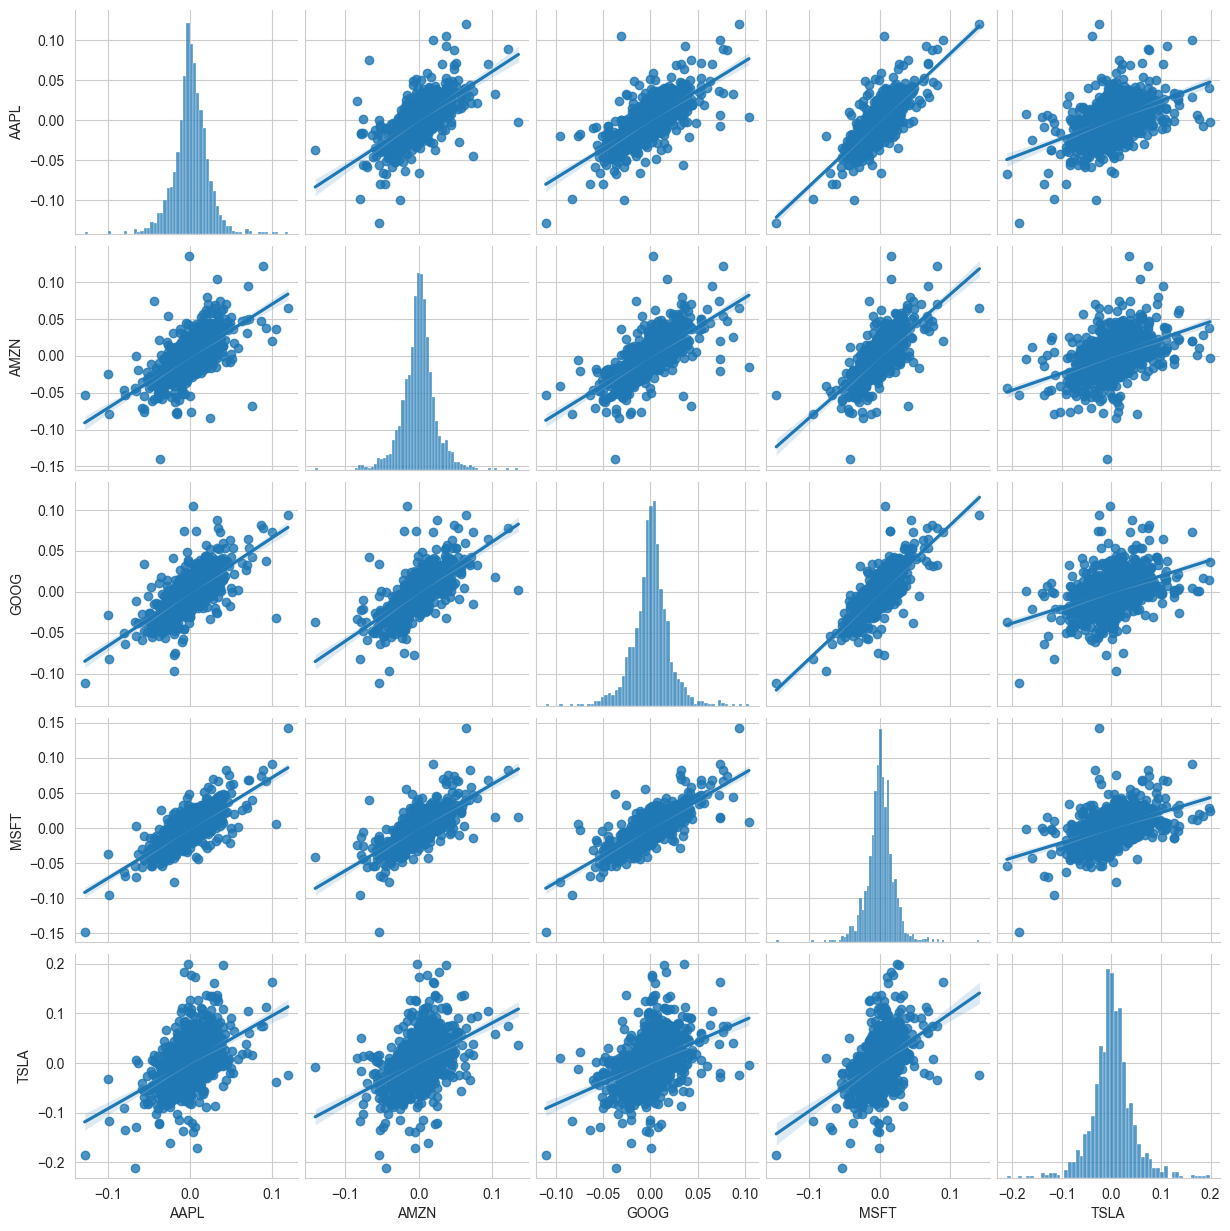

In [22]:
sns.pairplot(tech_rets, kind='reg')

<Axes: >

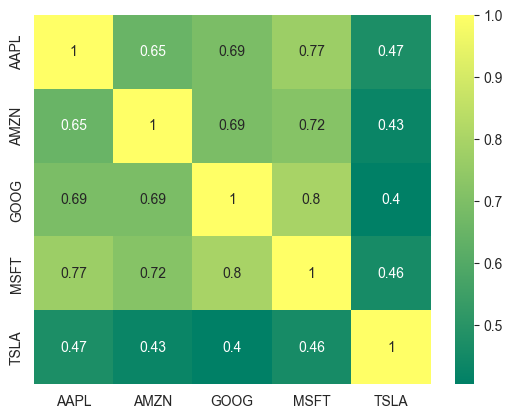

In [23]:
# Correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: >

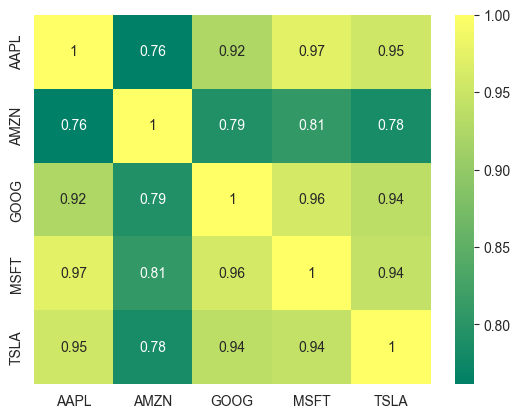

In [24]:
# Correlation plot for the closing price
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')